# 제 6 장 __지도학습의 이해__
___

## __사전설정__
---

(1) 저장소 데이터 가져오기

In [ ]:
!rm -rf /content/BizDataAnalysis/

In [ ]:
!git clone https://github.com/BizStat/BizDataAnalysis.git

Cloning into 'BizDataAnalysis'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 186 (delta 2), reused 9 (delta 1), pack-reused 174
Receiving objects: 100% (186/186), 101.26 MiB | 15.46 MiB/s, done.
Resolving deltas: 100% (55/55), done.
Updating files: 100% (45/45), done.



(2) matplotlib 환경에서 한글 사용

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -f -v
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (17.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and direc

런타임 메뉴에서 '세션 다시 시작' 후 다음의 명령문 실행

In [ ]:
from matplotlib import rc
rc('font', family='NanumGothicCoding')
rc('axes', unicode_minus=False)

(3) 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

___

## 6.4 __손글씨 숫자 인식__

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### (1) MNIST 데이터

* 데이터 압축풀기

In [ ]:
!unzip /content/BizDataAnalysis/DATA/mnist.zip # /content 폴더에 풀림

Archive:  /content/BizDataAnalysis/DATA/mnist.zip
replace mnist.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mnist.csv               


In [ ]:
mnist = pd.read_table('/content/mnist.csv',header=None,sep=',')

In [ ]:
mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist.shape

(70000, 785)

* 데이터 살펴보기

In [ ]:
X = mnist.iloc[:,1:]  # 28 x 29 픽셀 이미지
y = mnist.iloc[:,[0]] # 해당 이미지가 나타내는 숫자

In [ ]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
np.array(X.iloc[0]).reshape(28,28)

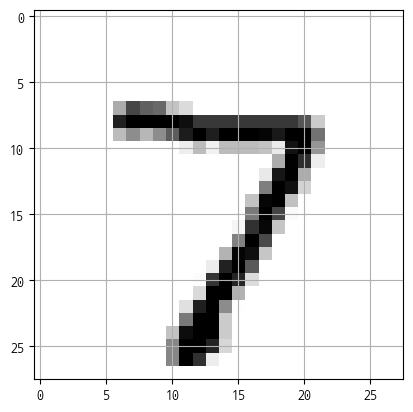

In [ ]:
plt.imshow(np.array(X.iloc[0]).reshape(28,28), cmap=plt.cm.gray_r, interpolation = "nearest")
plt.grid()

In [ ]:
y.head()

,0
0,7
1,2
2,1
3,0
4,4


* 데이터 분리 : 순서대로 학습 데이터 60,000개와 평가 데이터 10,000개 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=60000,shuffle=False)

In [ ]:
X_train.shape

(60000, 719)

In [ ]:
X_test.shape

(10000, 719)

* 데이터 전처리 : 이미지에서 나타나는 공통 여백 제거

In [ ]:
chk = X_train.apply(lambda x : (x==x[0]).all(),axis = 0)

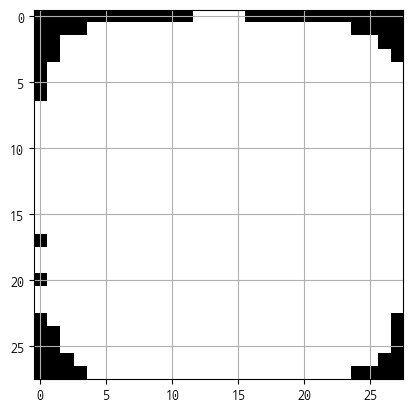

In [ ]:
plt.imshow(np.array(chk.apply(lambda x : int(x))).reshape(28,28), cmap=plt.cm.gray_r, interpolation = "nearest")
plt.grid()

In [ ]:
np.arange(784)[~chk]

In [ ]:
X_train = X_train.iloc[:,np.arange(784)[~chk]]

In [ ]:
X_test = X_test.iloc[:,np.arange(784)[~chk]]

* 종속변수를 포함하고 있는 데이터프레임을 1차원 배열로 변환

In [ ]:
y_train = y_train.iloc[:,0]
y_test = y_test.iloc[:,0]

---
__로지스틱 회귀모형__

* 로지스틱 회귀모형의 적합

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
LR = LogisticRegression(max_iter=10000,n_jobs=-1)
LR.fit(X_train,y_train)

LogisticRegression(max_iter=10000, n_jobs=-1)

* 로지스틱 회귀모형을 이용한 분류 결과 살펴보기

In [ ]:
LR.score(X_train,y_train)

0.9428833333333333

In [ ]:
LR.score(X_test,y_test)

0.9234

In [ ]:
y_pred = LR.predict(X_test)
y_train_pred = LR.predict(X_train)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5912
           1       0.97      0.98      0.98      6813
           2       0.94      0.93      0.93      6000
           3       0.92      0.92      0.92      6111
           4       0.95      0.95      0.95      5841
           5       0.92      0.91      0.91      5398
           6       0.96      0.97      0.96      5909
           7       0.95      0.95      0.95      6203
           8       0.91      0.91      0.91      5816
           9       0.92      0.92      0.92      5997

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       991
           1       0.95      0.97      0.96      1064
           2       0.93      0.90      0.91       990
           3       0.91      0.90      0.90      1030
           4       0.93      0.93      0.93       983
           5       0.88      0.87      0.88       915
           6       0.93      0.96      0.95       967
           7       0.93      0.94      0.94      1090
           8       0.91      0.89      0.90      1009
           9       0.91      0.90      0.91       961

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[5799,    1,   15,    5,    7,   18,   27,    3,   32,    5],
       [   1, 6682,   26,   20,    6,   13,    3,   11,   42,    9],
       [  15,   37, 5564,   82,   48,   27,   51,   47,  113,   16],
       [  14,   10,  114, 5623,    8,  149,   10,   44,   98,   41],
       [   5,   14,   27,    9, 5546,    7,   37,   16,   29,  151],
       [  33,   13,   34,  138,   46, 4904,   65,   10,  124,   31],
       [  30,   10,   29,    4,   27,   67, 5719,    1,   21,    1],
       [   5,   16,   57,   20,   36,    7,    3, 5885,   14,  160],
       [  24,   60,   56,  122,   21,  116,   35,   18, 5304,   60],
       [  18,   21,   11,   67,  118,   34,    1,  138,   42, 5547]])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 952,    0,    7,    2,    2,    9,    8,    7,    4,    0],
       [   0, 1030,    5,    8,    1,    5,    1,    2,   11,    1],
       [   7,   15,  887,   16,   12,    6,    8,   18,   17,    4],
       [   7,    1,   11,  929,    2,   46,    2,    3,   19,   10],
       [   4,    8,    7,    4,  918,    1,    7,    5,    6,   23],
       [   9,    2,   11,   33,   11,  795,   27,    6,   19,    2],
       [   6,    2,    9,    1,    8,    8,  930,    0,    3,    0],
       [   6,    4,    6,    6,   11,    1,    0, 1028,    2,   26],
       [   4,   17,    9,   16,    1,   25,   11,    7,  899,   20],
       [   4,    7,    1,    9,   25,    6,    1,   32,   10,  866]])

* 혼돈행렬 백분율로 나타내기

In [ ]:
pd.crosstab(index=y_test,columns=y_pred,normalize='index')

col_0,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,
0,0.960646,0.000000,0.007064,0.002018,0.002018,0.009082,0.008073,0.007064,0.004036,0.000000
1,0.000000,0.968045,0.004699,0.007519,0.000940,0.004699,0.000940,0.001880,0.010338,0.000940
2,0.007071,0.015152,0.895960,0.016162,0.012121,0.006061,0.008081,0.018182,0.017172,0.004040
3,0.006796,0.000971,0.010680,0.901942,0.001942,0.044660,0.001942,0.002913,0.018447,0.009709
4,0.004069,0.008138,0.007121,0.004069,0.933876,0.001017,0.007121,0.005086,0.006104,0.023398
5,0.009836,0.002186,0.012022,0.036066,0.012022,0.868852,0.029508,0.006557,0.020765,0.002186
6,0.006205,0.002068,0.009307,0.001034,0.008273,0.008273,0.961737,0.000000,0.003102,0.000000
7,0.005505,0.003670,0.005505,0.005505,0.010092,0.000917,0.000000,0.943119,0.001835,0.023853
8,0.003964,0.016848,0.008920,0.015857,0.000991,0.024777,0.010902,0.006938,0.890981,0.019822


In [ ]:
pd.crosstab(index=y_train,columns=y_train_pred,normalize='index')

col_0,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,
0,0.980886,0.000169,0.002537,0.000846,0.001184,0.003045,0.004567,0.000507,0.005413,0.000846
1,0.000147,0.980772,0.003816,0.002936,0.000881,0.001908,0.000440,0.001615,0.006165,0.001321
2,0.002500,0.006167,0.927333,0.013667,0.008000,0.004500,0.008500,0.007833,0.018833,0.002667
3,0.002291,0.001636,0.018655,0.920144,0.001309,0.024382,0.001636,0.007200,0.016037,0.006709
4,0.000856,0.002397,0.004622,0.001541,0.949495,0.001198,0.006335,0.002739,0.004965,0.025852
5,0.006113,0.002408,0.006299,0.025565,0.008522,0.908485,0.012041,0.001853,0.022971,0.005743
6,0.005077,0.001692,0.004908,0.000677,0.004569,0.011339,0.967846,0.000169,0.003554,0.000169
7,0.000806,0.002579,0.009189,0.003224,0.005804,0.001128,0.000484,0.948734,0.002257,0.025794
8,0.004127,0.010316,0.009629,0.020977,0.003611,0.019945,0.006018,0.003095,0.911967,0.010316


* 로지스틱 회귀모형에 의해 잘 못 인식된 최초 16개 사례

---
__kNN 분류__

* kNN 분류

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
KC = KNeighborsClassifier(n_neighbors=7,n_jobs=-1)
KC.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=7)

In [ ]:
KC.score(X_train,y_train)

0.97775

In [ ]:
KC.score(X_test,y_test)

0.9725

In [ ]:
y_pred = KC.predict(X_test)
y_train_pred = KC.predict(X_train)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5912
           1       0.96      1.00      0.98      6813
           2       0.99      0.97      0.98      6000
           3       0.98      0.97      0.98      6111
           4       0.99      0.97      0.98      5841
           5       0.98      0.98      0.98      5398
           6       0.98      0.99      0.99      5909
           7       0.97      0.98      0.98      6203
           8       0.99      0.95      0.97      5816
           9       0.96      0.97      0.97      5997

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       991
           1       0.96      1.00      0.98      1064
           2       0.99      0.96      0.98       990
           3       0.96      0.98      0.97      1030
           4       0.98      0.97      0.97       983
           5       0.97      0.95      0.96       915
           6       0.98      0.99      0.99       967
           7       0.96      0.98      0.97      1090
           8       0.99      0.94      0.96      1009
           9       0.96      0.96      0.96       961

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[5877,    5,    4,    0,    0,    6,   16,    2,    1,    1],
       [   1, 6787,    9,    0,    0,    0,    1,   11,    1,    3],
       [  36,   43, 5822,   10,    6,    2,    5,   66,    6,    4],
       [   4,   15,   28, 5958,    1,   37,    4,   32,   14,   18],
       [   3,   41,    1,    1, 5685,    0,   17,    4,    2,   87],
       [  13,    6,    3,   40,    4, 5264,   39,    6,    5,   18],
       [  20,   14,    1,    0,    6,   12, 5856,    0,    0,    0],
       [   1,   62,   11,    2,    9,    1,    0, 6071,    2,   44],
       [  17,   67,   10,   56,   23,   59,   21,   11, 5505,   47],
       [  13,   12,    7,   25,   35,    9,    3,   45,    8, 5840]])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 984,    0,    3,    0,    0,    0,    2,    0,    0,    2],
       [   0, 1060,    1,    0,    1,    0,    1,    1,    0,    0],
       [   3,    8,  955,    1,    1,    0,    1,   17,    3,    1],
       [   1,    0,    3, 1009,    0,    6,    0,    3,    6,    2],
       [   0,   11,    0,    0,  950,    0,    0,    2,    0,   20],
       [   2,    2,    2,   16,    2,  870,   16,    3,    0,    2],
       [   3,    0,    0,    0,    0,    2,  962,    0,    0,    0],
       [   0,    9,    1,    0,    4,    0,    0, 1067,    0,    9],
       [   3,   11,    0,   12,    4,   15,    4,    4,  950,    6],
       [   3,    3,    1,    9,   11,    3,    0,   10,    3,  918]])

In [ ]:
pd.crosstab(index=y_train,columns=y_train_pred,normalize='index')

col_0,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,
0,0.994080,0.000846,0.000677,0.000000,0.000000,0.001015,0.002706,0.000338,0.000169,0.000169
1,0.000147,0.996184,0.001321,0.000000,0.000000,0.000000,0.000147,0.001615,0.000147,0.000440
2,0.006000,0.007167,0.970333,0.001667,0.001000,0.000333,0.000833,0.011000,0.001000,0.000667
3,0.000655,0.002455,0.004582,0.974963,0.000164,0.006055,0.000655,0.005236,0.002291,0.002946
4,0.000514,0.007019,0.000171,0.000171,0.973292,0.000000,0.002910,0.000685,0.000342,0.014895
5,0.002408,0.001112,0.000556,0.007410,0.000741,0.975176,0.007225,0.001112,0.000926,0.003335
6,0.003385,0.002369,0.000169,0.000000,0.001015,0.002031,0.991031,0.000000,0.000000,0.000000
7,0.000161,0.009995,0.001773,0.000322,0.001451,0.000161,0.000000,0.978720,0.000322,0.007093
8,0.002923,0.011520,0.001719,0.009629,0.003955,0.010144,0.003611,0.001891,0.946527,0.008081


In [ ]:
pd.crosstab(index=y_test,columns=y_pred,normalize='index')

col_0,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,
0,0.992936,0.000000,0.003027,0.000000,0.000000,0.000000,0.002018,0.000000,0.000000,0.002018
1,0.000000,0.996241,0.000940,0.000000,0.000940,0.000000,0.000940,0.000940,0.000000,0.000000
2,0.003030,0.008081,0.964646,0.001010,0.001010,0.000000,0.001010,0.017172,0.003030,0.001010
3,0.000971,0.000000,0.002913,0.979612,0.000000,0.005825,0.000000,0.002913,0.005825,0.001942
4,0.000000,0.011190,0.000000,0.000000,0.966429,0.000000,0.000000,0.002035,0.000000,0.020346
5,0.002186,0.002186,0.002186,0.017486,0.002186,0.950820,0.017486,0.003279,0.000000,0.002186
6,0.003102,0.000000,0.000000,0.000000,0.000000,0.002068,0.994829,0.000000,0.000000,0.000000
7,0.000000,0.008257,0.000917,0.000000,0.003670,0.000000,0.000000,0.978899,0.000000,0.008257
8,0.002973,0.010902,0.000000,0.011893,0.003964,0.014866,0.003964,0.003964,0.941526,0.005946


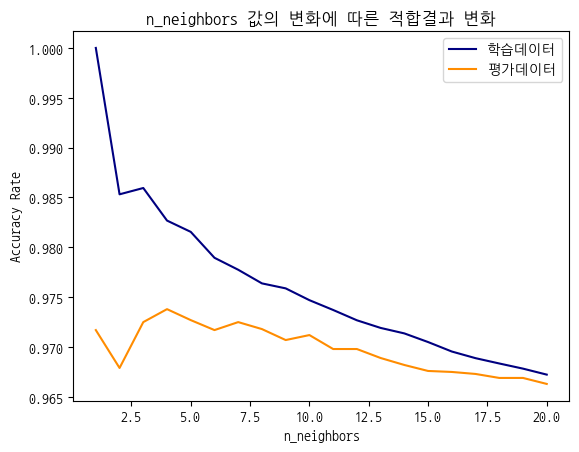

In [ ]:
niter = 20
optVal = np.zeros((niter,3))
for k in range(1, niter+1):
    KC = KNeighborsClassifier(n_neighbors=k,weights='uniform',n_jobs=-1)
    KC.fit(X_train, y_train)
    optVal[k-1,0] = k
    optVal[k-1,1] = KC.score(X_train, y_train)
    optVal[k-1,2] = KC.score(X_test, y_test)

plt.plot(optVal[:,0],optVal[:,1],color='navy',label='학습데이터')
plt.plot(optVal[:,0],optVal[:,2],color='darkorange',label='평가데이터')
plt.title('n_neighbors 값의 변화에 따른 적합결과 변화')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy Rate')
plt.legend()
plt.show()

In [ ]:
optVal[optVal[:,2] == max(optVal[:,2]),]

* kNN 최적 모형

In [ ]:
KC = KNeighborsClassifier(n_neighbors=4,n_jobs=-1)
KC.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4)

In [ ]:
KC.score(X_train,y_train)

0.9826833333333334

In [ ]:
KC.score(X_test,y_test)

0.9738

In [ ]:
y_pred = KC.predict(X_test)
y_train_pred = KC.predict(X_train)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5912
           1       0.97      1.00      0.98      6813
           2       0.99      0.98      0.98      6000
           3       0.98      0.98      0.98      6111
           4       0.99      0.99      0.99      5841
           5       0.98      0.98      0.98      5398
           6       0.99      0.99      0.99      5909
           7       0.98      0.98      0.98      6203
           8       1.00      0.95      0.97      5816
           9       0.98      0.97      0.98      5997

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       991
           1       0.96      1.00      0.98      1064
           2       0.99      0.97      0.98       990
           3       0.96      0.98      0.97      1030
           4       0.98      0.97      0.97       983
           5       0.97      0.95      0.96       915
           6       0.98      1.00      0.99       967
           7       0.97      0.98      0.97      1090
           8       0.99      0.93      0.96      1009
           9       0.96      0.95      0.96       961

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[5894,    4,    2,    0,    1,    4,    3,    2,    1,    1],
       [   1, 6800,    3,    1,    1,    0,    0,    4,    1,    2],
       [  33,   36, 5882,    6,    2,    1,    1,   34,    2,    3],
       [   3,   11,   27, 6012,    0,   17,    0,   20,   10,   11],
       [   3,   37,    2,    1, 5755,    0,    9,    2,    1,   31],
       [  18,    5,    1,   46,    5, 5290,   20,    2,    1,   10],
       [  21,   14,    0,    0,    7,   14, 5853,    0,    0,    0],
       [   2,   51,   17,    1,   11,    0,    0, 6102,    1,   18],
       [  17,   60,   17,   52,   21,   53,   20,   14, 5537,   25],
       [  13,    8,    6,   20,   39,    7,    3,   60,    5, 5836]])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 988,    0,    1,    0,    0,    0,    0,    0,    0,    2],
       [   0, 1062,    1,    0,    0,    0,    0,    1,    0,    0],
       [   5,    7,  961,    1,    2,    0,    1,   11,    1,    1],
       [   0,    0,    6, 1012,    0,    2,    0,    2,    6,    2],
       [   0,   10,    0,    0,  955,    0,    0,    2,    0,   16],
       [   3,    1,    1,   21,    2,  868,   13,    2,    1,    3],
       [   2,    0,    0,    0,    0,    2,  963,    0,    0,    0],
       [   0,   10,    0,    0,    3,    0,    0, 1069,    0,    8],
       [   1,   10,    1,   15,    5,   18,    5,    5,  943,    6],
       [   3,    3,    1,    9,   12,    2,    0,   12,    2,  917]])

In [ ]:
pd.crosstab(index=y_train,columns=y_train_pred,normalize='index')

col_0,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,
0,0.996955,0.000677,0.000338,0.000000,0.000169,0.000677,0.000507,0.000338,0.000169,0.000169
1,0.000147,0.998092,0.000440,0.000147,0.000147,0.000000,0.000000,0.000587,0.000147,0.000294
2,0.005500,0.006000,0.980333,0.001000,0.000333,0.000167,0.000167,0.005667,0.000333,0.000500
3,0.000491,0.001800,0.004418,0.983800,0.000000,0.002782,0.000000,0.003273,0.001636,0.001800
4,0.000514,0.006335,0.000342,0.000171,0.985276,0.000000,0.001541,0.000342,0.000171,0.005307
5,0.003335,0.000926,0.000185,0.008522,0.000926,0.979993,0.003705,0.000371,0.000185,0.001853
6,0.003554,0.002369,0.000000,0.000000,0.001185,0.002369,0.990523,0.000000,0.000000,0.000000
7,0.000322,0.008222,0.002741,0.000161,0.001773,0.000000,0.000000,0.983718,0.000161,0.002902
8,0.002923,0.010316,0.002923,0.008941,0.003611,0.009113,0.003439,0.002407,0.952029,0.004298


In [ ]:
pd.crosstab(index=y_test,columns=y_pred,normalize='index')

col_0,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,
0,0.996973,0.000000,0.001009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002018
1,0.000000,0.998120,0.000940,0.000000,0.000000,0.000000,0.000000,0.000940,0.000000,0.000000
2,0.005051,0.007071,0.970707,0.001010,0.002020,0.000000,0.001010,0.011111,0.001010,0.001010
3,0.000000,0.000000,0.005825,0.982524,0.000000,0.001942,0.000000,0.001942,0.005825,0.001942
4,0.000000,0.010173,0.000000,0.000000,0.971516,0.000000,0.000000,0.002035,0.000000,0.016277
5,0.003279,0.001093,0.001093,0.022951,0.002186,0.948634,0.014208,0.002186,0.001093,0.003279
6,0.002068,0.000000,0.000000,0.000000,0.000000,0.002068,0.995863,0.000000,0.000000,0.000000
7,0.000000,0.009174,0.000000,0.000000,0.002752,0.000000,0.000000,0.980734,0.000000,0.007339
8,0.000991,0.009911,0.000991,0.014866,0.004955,0.017839,0.004955,0.004955,0.934589,0.005946


In [ ]:
#@title 결과 출력
y_pred = KC.predict(X_test)
y_train_pred = KC.predict(X_train)
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_pred))
confusion_matrix(y_train, y_train_pred)
confusion_matrix(y_test, y_pred)
pd.crosstab(index=y_train,columns=y_train_pred,normalize='index')
pd.crosstab(index=y_test,columns=y_pred,normalize='index')

---
__분류나무__

* 분류나무 사례

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [ ]:
DC = DecisionTreeClassifier(random_state=3)
DC.fit(X_train,y_train)

DecisionTreeClassifier(random_state=3)

In [ ]:
DC.score(X_train,y_train)

1.0

In [ ]:
DC.score(X_test,y_test)

0.8871

In [ ]:
y_pred = DC.predict(X_test)
y_train_pred = DC.predict(X_train)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5912
           1       1.00      1.00      1.00      6813
           2       1.00      1.00      1.00      6000
           3       1.00      1.00      1.00      6111
           4       1.00      1.00      1.00      5841
           5       1.00      1.00      1.00      5398
           6       1.00      1.00      1.00      5909
           7       1.00      1.00      1.00      6203
           8       1.00      1.00      1.00      5816
           9       1.00      1.00      1.00      5997

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       991
           1       0.95      0.97      0.96      1064
           2       0.88      0.87      0.87       990
           3       0.86      0.86      0.86      1030
           4       0.88      0.88      0.88       983
           5       0.86      0.83      0.84       915
           6       0.91      0.91      0.91       967
           7       0.90      0.93      0.92      1090
           8       0.85      0.84      0.84      1009
           9       0.83      0.82      0.83       961

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[5912,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6813,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 6000,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6111,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5841,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5398,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5909,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6203,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5816,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5997]])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 933,    1,    6,    4,    5,    8,   11,    1,   11,   11],
       [   1, 1037,    3,    3,    1,    2,    2,    4,    7,    4],
       [  13,   10,  857,   28,   13,    4,    9,   20,   26,   10],
       [   8,    7,   22,  889,    9,   44,    7,   10,   16,   18],
       [   1,    4,   12,    5,  861,    6,   17,   12,   19,   46],
       [  14,    5,   12,   36,   11,  763,   18,    7,   23,   26],
       [   8,    9,   15,    2,    8,   17,  883,    4,   16,    5],
       [   2,    6,    7,   18,    6,    4,    1, 1012,    9,   25],
       [   6,   10,   22,   30,   17,   24,   23,   13,  846,   18],
       [   6,    5,   14,   16,   48,   20,    3,   36,   23,  790]])

In [ ]:
pd.crosstab(index=y_train,columns=y_train_pred,normalize='index')

col_0,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
pd.crosstab(index=y_test,columns=y_pred,normalize='index')

col_0,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,
0,0.941473,0.001009,0.006054,0.004036,0.005045,0.008073,0.011100,0.001009,0.011100,0.011100
1,0.000940,0.974624,0.002820,0.002820,0.000940,0.001880,0.001880,0.003759,0.006579,0.003759
2,0.013131,0.010101,0.865657,0.028283,0.013131,0.004040,0.009091,0.020202,0.026263,0.010101
3,0.007767,0.006796,0.021359,0.863107,0.008738,0.042718,0.006796,0.009709,0.015534,0.017476
4,0.001017,0.004069,0.012208,0.005086,0.875890,0.006104,0.017294,0.012208,0.019329,0.046796
5,0.015301,0.005464,0.013115,0.039344,0.012022,0.833880,0.019672,0.007650,0.025137,0.028415
6,0.008273,0.009307,0.015512,0.002068,0.008273,0.017580,0.913133,0.004137,0.016546,0.005171
7,0.001835,0.005505,0.006422,0.016514,0.005505,0.003670,0.000917,0.928440,0.008257,0.022936
8,0.005946,0.009911,0.021804,0.029732,0.016848,0.023786,0.022795,0.012884,0.838454,0.017839


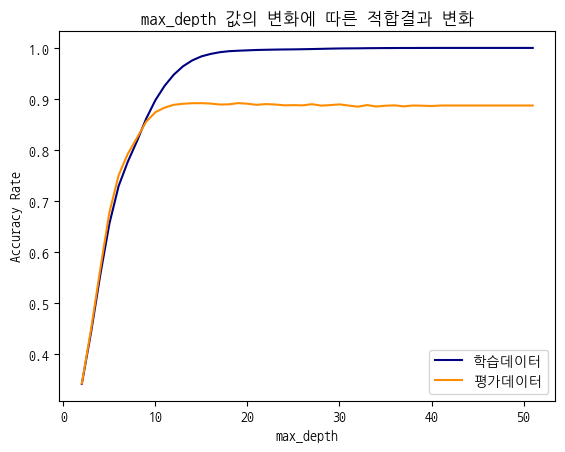

In [ ]:
# @title max_depth 변화에 따른 회귀나무의 성능 비교
niter = 50
optVal = np.zeros((niter,3))
for k in range(2, niter+2):
    DC = DecisionTreeClassifier(max_depth=k,random_state=3)
    DC.fit(X_train, y_train)
    optVal[k-2,0] = k
    optVal[k-2,1] = DC.score(X_train, y_train)
    optVal[k-2,2] = DC.score(X_test, y_test)

plt.plot(optVal[:,0],optVal[:,1],color='navy',label='학습데이터')
plt.plot(optVal[:,0],optVal[:,2],color='darkorange',label='평가데이터')
plt.title('max_depth 값의 변화에 따른 적합결과 변화')
plt.xlabel('max_depth')
plt.ylabel('Accuracy Rate')
plt.legend()
plt.show()

In [ ]:
optVal[optVal[:,2] == max(optVal[:,2]),]

array([[19.        ,  0.99451667,  0.8918    ]])

In [ ]:
#@title 최적 모형
DC = DecisionTreeClassifier(max_depth=19,random_state=3)
DC.fit(X_train,y_train)

In [ ]:
DC.score(X_train,y_train)

0.9945166666666667

In [ ]:
DC.score(X_test,y_test)

0.8918

In [ ]:
y_pred = KC.predict(X_test)
y_train_pred = KC.predict(X_train)

In [ ]:
print("## 학습 데이터에 대한 분류 정확도")
print(classification_report(y_train, y_train_pred))
print("## 평가 데이터에 대한 분류 정확도")
print(classification_report(y_test, y_pred))
print("## 학습 데이터에 대한 혼돈행렬")
print(confusion_matrix(y_train, y_train_pred))
print("## 학습 데이터에 대한 혼돈행렬")
print(confusion_matrix(y_test, y_pred))

## 학습 데이터에 대한 분류 정확도
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5912
           1       0.97      1.00      0.98      6813
           2       0.99      0.98      0.98      6000
           3       0.98      0.98      0.98      6111
           4       0.99      0.99      0.99      5841
           5       0.98      0.98      0.98      5398
           6       0.99      0.99      0.99      5909
           7       0.98      0.98      0.98      6203
           8       1.00      0.95      0.97      5816
           9       0.98      0.97      0.98      5997

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000

## 평가 데이터에 대한 분류 정확도
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       991
           1       0.96      1.00      0.98      1064
           2       0.99      0.97   

In [ ]:
pd.crosstab(index=y_train,columns=y_train_pred,normalize='index')

col_0,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,
0,0.996955,0.000677,0.000338,0.000000,0.000169,0.000677,0.000507,0.000338,0.000169,0.000169
1,0.000147,0.998092,0.000440,0.000147,0.000147,0.000000,0.000000,0.000587,0.000147,0.000294
2,0.005500,0.006000,0.980333,0.001000,0.000333,0.000167,0.000167,0.005667,0.000333,0.000500
3,0.000491,0.001800,0.004418,0.983800,0.000000,0.002782,0.000000,0.003273,0.001636,0.001800
4,0.000514,0.006335,0.000342,0.000171,0.985276,0.000000,0.001541,0.000342,0.000171,0.005307
5,0.003335,0.000926,0.000185,0.008522,0.000926,0.979993,0.003705,0.000371,0.000185,0.001853
6,0.003554,0.002369,0.000000,0.000000,0.001185,0.002369,0.990523,0.000000,0.000000,0.000000
7,0.000322,0.008222,0.002741,0.000161,0.001773,0.000000,0.000000,0.983718,0.000161,0.002902
8,0.002923,0.010316,0.002923,0.008941,0.003611,0.009113,0.003439,0.002407,0.952029,0.004298


In [ ]:
pd.crosstab(index=y_test,columns=y_pred,normalize='index')

col_0,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,
0,0.996973,0.000000,0.001009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002018
1,0.000000,0.998120,0.000940,0.000000,0.000000,0.000000,0.000000,0.000940,0.000000,0.000000
2,0.005051,0.007071,0.970707,0.001010,0.002020,0.000000,0.001010,0.011111,0.001010,0.001010
3,0.000000,0.000000,0.005825,0.982524,0.000000,0.001942,0.000000,0.001942,0.005825,0.001942
4,0.000000,0.010173,0.000000,0.000000,0.971516,0.000000,0.000000,0.002035,0.000000,0.016277
5,0.003279,0.001093,0.001093,0.022951,0.002186,0.948634,0.014208,0.002186,0.001093,0.003279
6,0.002068,0.000000,0.000000,0.000000,0.000000,0.002068,0.995863,0.000000,0.000000,0.000000
7,0.000000,0.009174,0.000000,0.000000,0.002752,0.000000,0.000000,0.980734,0.000000,0.007339
8,0.000991,0.009911,0.000991,0.014866,0.004955,0.017839,0.004955,0.004955,0.934589,0.005946


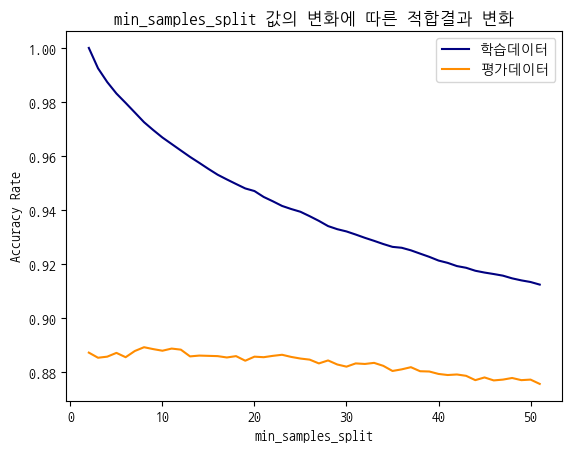

In [ ]:
# @title min_samples_split 변화에 따른 회귀나무의 성능 비교
niter = 50
optVal = np.zeros((niter,3))
for k in range(2, niter+2):
    DC = DecisionTreeClassifier(min_samples_split=k,random_state=3)
    DC.fit(X_train, y_train)
    optVal[k-2,0] = k
    optVal[k-2,1] = DC.score(X_train, y_train)
    optVal[k-2,2] = DC.score(X_test, y_test)

plt.plot(optVal[:,0],optVal[:,1],color='navy',label='학습데이터')
plt.plot(optVal[:,0],optVal[:,2],color='darkorange',label='평가데이터')
plt.title('min_samples_split 값의 변화에 따른 적합결과 변화')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy Rate')
plt.legend()
plt.show()

In [ ]:
 optVal[optVal[:,2] == max(optVal[:,2]),]

array([[8.        , 0.97248333, 0.8891    ]])

In [ ]:
#@title 최적 모형
DC = DecisionTreeClassifier(min_samples_split=8,random_state=3)
DC.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=8, random_state=3)

In [ ]:
DC.score(X_train,y_train)

0.9724833333333334

In [ ]:
DC.score(X_test,y_test)

0.8891

In [ ]:
y_pred = DC.predict(X_test)
y_train_pred = DC.predict(X_train)
print("## 학습 데이터에 대한 분류 정확도")
print(classification_report(y_train, y_train_pred))
print("## 평가 데이터에 대한 분류 정확도")
print(classification_report(y_test, y_pred))
print("## 학습 데이터에 대한 혼돈행렬")
print(confusion_matrix(y_train, y_train_pred))
print("## 평가 데이터에 대한 혼돈행렬")
print(confusion_matrix(y_test, y_pred))

## 학습 데이터에 대한 분류 정확도
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5912
           1       0.98      0.99      0.99      6813
           2       0.95      0.98      0.96      6000
           3       0.97      0.97      0.97      6111
           4       0.97      0.97      0.97      5841
           5       0.97      0.96      0.96      5398
           6       0.98      0.97      0.98      5909
           7       0.98      0.97      0.98      6203
           8       0.97      0.95      0.96      5816
           9       0.98      0.96      0.97      5997

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000

## 평가 데이터에 대한 분류 정확도
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       991
           1       0.95      0.97      0.96      1064
           2       0.86      0.87   

In [ ]:
pd.crosstab(index=y_train,columns=y_train_pred,normalize='index')

col_0,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,
0,0.987314,0.000169,0.002368,0.002030,0.000677,0.001861,0.002030,0.001015,0.001522,0.001015
1,0.000294,0.992955,0.001027,0.001908,0.000587,0.000440,0.000294,0.000881,0.001027,0.000587
2,0.004500,0.002833,0.976333,0.003500,0.002333,0.000833,0.002333,0.002500,0.003333,0.001500
3,0.004091,0.001800,0.008509,0.967436,0.001800,0.005727,0.001473,0.003436,0.004091,0.001636
4,0.001883,0.001883,0.006677,0.003253,0.972094,0.001198,0.002226,0.001370,0.004794,0.004622
5,0.003705,0.002408,0.006854,0.006854,0.002964,0.964246,0.003520,0.002223,0.005002,0.002223
6,0.004400,0.002369,0.003554,0.003554,0.002369,0.004400,0.974615,0.001185,0.003046,0.000508
7,0.002579,0.002418,0.005642,0.002902,0.003385,0.003224,0.000806,0.974045,0.001935,0.003063
8,0.003955,0.002407,0.009972,0.007737,0.005158,0.008425,0.004127,0.003095,0.952201,0.002923


In [ ]:
pd.crosstab(index=y_test,columns=y_pred,normalize='index')

col_0,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,
0,0.937437,0.001009,0.009082,0.006054,0.002018,0.010091,0.012109,0.001009,0.012109,0.009082
1,0.000940,0.972744,0.002820,0.004699,0.001880,0.000940,0.001880,0.003759,0.009398,0.000940
2,0.012121,0.011111,0.873737,0.023232,0.010101,0.006061,0.010101,0.018182,0.020202,0.015152
3,0.009709,0.006796,0.024272,0.867961,0.007767,0.041748,0.006796,0.011650,0.008738,0.014563
4,0.002035,0.006104,0.015259,0.006104,0.883011,0.004069,0.012208,0.010173,0.017294,0.043744
5,0.010929,0.005464,0.014208,0.044809,0.008743,0.840437,0.019672,0.012022,0.021858,0.021858
6,0.011375,0.009307,0.016546,0.004137,0.011375,0.011375,0.908997,0.003102,0.019648,0.004137
7,0.001835,0.006422,0.011009,0.011927,0.008257,0.001835,0.000000,0.931193,0.004587,0.022936
8,0.005946,0.008920,0.029732,0.032706,0.013875,0.024777,0.013875,0.015857,0.837463,0.016848


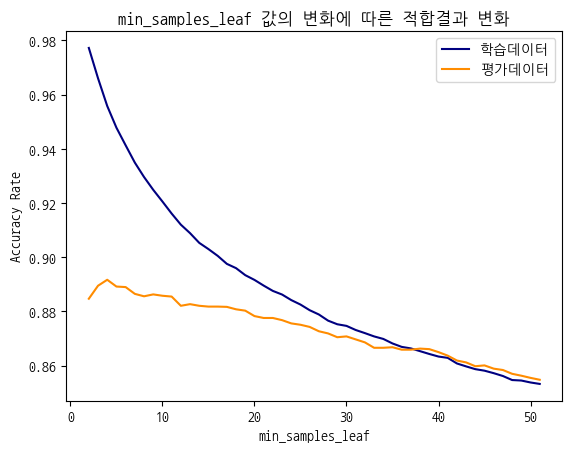

In [ ]:
# @title min_samples_leaf 변화에 따른 회귀나무의 성능 비교
niter = 50
optVal = np.zeros((niter,3))
for k in range(2, niter+2):
    DC = DecisionTreeClassifier(min_samples_leaf=k,random_state=3)
    DC.fit(X_train, y_train)
    optVal[k-2,0] = k
    optVal[k-2,1] = DC.score(X_train, y_train)
    optVal[k-2,2] = DC.score(X_test, y_test)

plt.plot(optVal[:,0],optVal[:,1],color='navy',label='학습데이터')
plt.plot(optVal[:,0],optVal[:,2],color='darkorange',label='평가데이터')
plt.title('min_samples_leaf 값의 변화에 따른 적합결과 변화')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy Rate')
plt.legend()
plt.show()

In [ ]:
optVal[optVal[:,2] == max(optVal[:,2]),]

array([[4.        , 0.95581667, 0.8917    ]])

In [ ]:
#@title 최적 모형
DC = DecisionTreeClassifier(min_samples_leaf=4,random_state=3)
DC.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=3)

In [ ]:
DC.score(X_train,y_train)

0.9558166666666666

In [ ]:
DC.score(X_test,y_test)

0.8917

In [ ]:
y_pred = DC.predict(X_test)
y_train_pred = DC.predict(X_train)
print("## 학습 데이터에 대한 분류 정확도")
print(classification_report(y_train, y_train_pred))
print("## 평가 데이터에 대한 분류 정확도")
print(classification_report(y_test, y_pred))
print("## 학습 데이터에 대한 혼돈행렬")
print(confusion_matrix(y_train, y_train_pred))
print("## 학습 데이터에 대한 혼돈행렬")
print(confusion_matrix(y_test, y_pred))

## 학습 데이터에 대한 분류 정확도
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5912
           1       0.97      0.99      0.98      6813
           2       0.93      0.96      0.95      6000
           3       0.94      0.95      0.95      6111
           4       0.95      0.96      0.95      5841
           5       0.94      0.94      0.94      5398
           6       0.97      0.96      0.96      5909
           7       0.97      0.96      0.96      6203
           8       0.95      0.93      0.94      5816
           9       0.96      0.93      0.95      5997

    accuracy                           0.96     60000
   macro avg       0.96      0.96      0.96     60000
weighted avg       0.96      0.96      0.96     60000

## 평가 데이터에 대한 분류 정확도
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       991
           1       0.94      0.97      0.96      1064
           2       0.86      0.88   

In [ ]:
pd.crosstab(index=y_train,columns=y_train_pred,normalize='index')

col_0,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,
0,0.978857,0.000169,0.003383,0.003045,0.001015,0.002706,0.004567,0.001691,0.003383,0.001184
1,0.000881,0.986643,0.001761,0.002789,0.000440,0.001615,0.001027,0.001761,0.002348,0.000734
2,0.005833,0.003667,0.959167,0.007167,0.004333,0.003333,0.002833,0.004500,0.006167,0.003000
3,0.003109,0.002946,0.015546,0.947635,0.001964,0.010146,0.003109,0.005564,0.006382,0.003600
4,0.003082,0.002910,0.007019,0.004109,0.955658,0.001541,0.004451,0.002739,0.007533,0.010957
5,0.007225,0.005372,0.007040,0.013709,0.005002,0.940904,0.007225,0.002594,0.007225,0.003705
6,0.007616,0.002369,0.006092,0.004569,0.005077,0.007616,0.960230,0.001354,0.004569,0.000508
7,0.002096,0.003708,0.008544,0.003708,0.005481,0.004030,0.000806,0.962438,0.002902,0.006287
8,0.004470,0.006018,0.013239,0.012895,0.007221,0.010660,0.006534,0.004127,0.928645,0.006190


In [ ]:
pd.crosstab(index=y_test,columns=y_pred,normalize='index')

col_0,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,
0,0.943491,0.001009,0.010091,0.009082,0.002018,0.008073,0.012109,0.001009,0.010091,0.003027
1,0.001880,0.971805,0.003759,0.004699,0.000940,0.002820,0.001880,0.001880,0.008459,0.001880
2,0.009091,0.011111,0.875758,0.019192,0.013131,0.007071,0.011111,0.017172,0.026263,0.010101
3,0.008738,0.004854,0.031068,0.866990,0.007767,0.045631,0.005825,0.007767,0.007767,0.013592
4,0.004069,0.007121,0.013225,0.005086,0.893184,0.005086,0.011190,0.008138,0.015259,0.037640
5,0.010929,0.005464,0.012022,0.051366,0.009836,0.840437,0.019672,0.007650,0.020765,0.021858
6,0.009307,0.011375,0.017580,0.005171,0.011375,0.013444,0.908997,0.004137,0.016546,0.002068
7,0.002752,0.003670,0.012844,0.013761,0.004587,0.002752,0.000000,0.929358,0.006422,0.023853
8,0.008920,0.011893,0.030723,0.036670,0.009911,0.018831,0.012884,0.014866,0.840436,0.014866


* 분류 나무 기반의 앙상블 모형

In [ ]:
#@title Bagging based Classification Tree
# 기본모형
DC = DecisionTreeClassifier(random_state=3)
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier(
            estimator = DC, #
            n_estimators=500, # 붓스트랩 표본추출 횟수
            max_samples=1, # 붓스트랩 표본추출 비율
            bootstrap=True, # 복원 추출 (기본값)
            oob_score=True, # Out-of-bag 데이터를 이용한 성능 계산
            random_state=3
        )
BC.fit(X_train,y_train)

In [ ]:
BC.score(X_train,y_train)

0.09995

In [ ]:
BC.score(X_test,y_test)

0.0961

In [ ]:
y_pred = BC.predict(X_test)
y_train_pred = BC.predict(X_train)

In [ ]:
pd.crosstab(index=y_test,columns=y_pred,normalize='index')

col_0,9
0,
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0


In [ ]:
#@title Random Forest
from sklearn.ensemble import RandomForestClassifier  # 랜덤 포레스트
RFC = RandomForestClassifier(
        n_estimators= 1000, # 붓스트렙 표본추출 횟수
        criterion = 'gini',
#        max_depth = 5,
#        min_samples_split = 20,
#        min_samples_leaf = 5,
        random_state=3)
RFC.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=3)

In [ ]:
RFC.score(X_train,y_train)

1.0

In [ ]:
RFC.score(X_test,y_test)

0.9748

In [ ]:
y_pred = RFC.predict(X_test)
y_train_pred = RFC.predict(X_train)

In [ ]:
pd.crosstab(index=y_test,columns=y_pred,normalize='index')

col_0,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,
0,0.988900,0.000000,0.003027,0.000000,0.000000,0.000000,0.002018,0.000000,0.004036,0.002018
1,0.000000,0.989662,0.004699,0.000940,0.000940,0.000940,0.000000,0.000940,0.000940,0.000940
2,0.004040,0.000000,0.975758,0.000000,0.002020,0.001010,0.002020,0.006061,0.006061,0.003030
3,0.001942,0.000000,0.003883,0.972816,0.000000,0.007767,0.000000,0.002913,0.006796,0.003883
4,0.000000,0.004069,0.000000,0.000000,0.977620,0.000000,0.003052,0.001017,0.001017,0.013225
5,0.003279,0.000000,0.004372,0.013115,0.002186,0.956284,0.010929,0.001093,0.006557,0.002186
6,0.001034,0.000000,0.000000,0.000000,0.001034,0.003102,0.991727,0.000000,0.003102,0.000000
7,0.000917,0.004587,0.007339,0.000917,0.002752,0.000000,0.000000,0.973394,0.000000,0.010092
8,0.000991,0.003964,0.006938,0.003964,0.001982,0.005946,0.003964,0.000000,0.965312,0.006938


In [ ]:
from xgboost import XGBClassifier # 종속변수가 숫자로 입력

In [ ]:
#@title Gradient Boosting
GB = XGBClassifier(random_state=3,
                      eval_metric='logloss', # 기준이 되는 손실함수
                      booster = 'gbtree', # 부스팅 알고리즘 (또는 dart, gblinear)
                      objective = 'binary:logistic',
                      max_depth = 2, # 나무의 최대깊이
                      learning_rate = 0.1, # 학습률(최대 값 1) (강의노트 84쪽 lambda값)
                      n_estimators = 500, #  부스팅 라운딩 횟수(강의노트 84쪽 B값)
                      subsample = 1, # 붓스트랩 표본추출 비율
                      colsample_bytree = 1 # 독립변수의 추출 비율
)
GB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
GB.score(X_train,y_train)

0.9657833333333333

In [ ]:
GB.score(X_test,y_test)

0.9568

In [ ]:
y_pred = GB.predict(X_test)
y_train_pred = GB.predict(X_train)

In [ ]:
pd.crosstab(index=y_test,columns=y_pred,normalize='index')

col_0,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,
0,0.983855,0.000000,0.003027,0.001009,0.001009,0.000000,0.004036,0.001009,0.004036,0.002018
1,0.000000,0.988722,0.003759,0.002820,0.000940,0.000000,0.000940,0.000940,0.001880,0.000000
2,0.004040,0.002020,0.944444,0.005051,0.010101,0.002020,0.004040,0.013131,0.011111,0.004040
3,0.003883,0.002913,0.016505,0.933010,0.000000,0.021359,0.001942,0.001942,0.013592,0.004854
4,0.001017,0.006104,0.001017,0.001017,0.961343,0.001017,0.005086,0.002035,0.003052,0.018311
5,0.007650,0.001093,0.005464,0.027322,0.004372,0.912568,0.018579,0.002186,0.015301,0.005464
6,0.003102,0.000000,0.000000,0.000000,0.002068,0.002068,0.989659,0.000000,0.003102,0.000000
7,0.000917,0.003670,0.007339,0.004587,0.003670,0.000917,0.000000,0.967890,0.001835,0.009174
8,0.002973,0.004955,0.002973,0.009911,0.000991,0.007929,0.002973,0.002973,0.946482,0.017839


---
* 부스팅 라운드 횟수에 따른 성능 비교
---

In [ ]:
# @title GBM에서 부스팅 라운드 횟수 변화에 따른 분류 정확도
niter = 15
optVal = np.zeros((niter,3))
for k in range(1, niter+1):
    GB = XGBClassifier(random_state=3,
                      eval_metric='logloss', # 기준이 되는 손실함수
                      booster = 'gbtree', # 부스팅 알고리즘 (또는 dart, gblinear)
                      objective = 'binary:logistic',
                      max_depth = 2, # 나무의 최대깊이
                      learning_rate = 0.1, # 학습률(최대 값 1) (강의노트 84쪽 lambda값)
                      n_estimators = 100*k, #  부스팅 라운딩 횟수(강의노트 84쪽 B값)
                      subsample = 1, # 붓스트랩 표본추출 비율
                      colsample_bytree = 1 # 독립변수의 추출 비율
    )
    GB.fit(X_train, y_train)
    optVal[k-1,0] = 100*k
    optVal[k-1,1] = GB.score(X_train, y_train)
    optVal[k-1,2] = GB.score(X_test, y_test)

plt.plot(optVal[:,0],optVal[:,1],color='navy',label='학습데이터')
plt.plot(optVal[:,0],optVal[:,2],color='darkorange',label='평가데이터')
plt.title('부스팅 라운드 횟수에 따른 분류 정확도의 변화')
plt.xlabel('Number of boostin rounds')
plt.ylabel('Accuracy Rate')
plt.legend()
plt.show()